In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## SIFT

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    gray= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    sift = cv2.xfeatures2d.SIFT_create()
    
    #kp, des = sift.detectAndCompute(gray,None)
    kp = sift.detect(gray,None)

    img = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #img=cv2.drawKeypoints(gray,kp)

    cv2.imshow('dst',img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## SIFT with FLANN Matching

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img2 = cv2.imread('./SIFT/Pen.jpg',0) # trainImage

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(frame,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary

    flann = cv2.FlannBasedMatcher(index_params,search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]

    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i]=[1,0]

    draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)
    
    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(frame,kp1,img2,kp2,matches,None,**draw_params)

    cv2.imshow('dst',img3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

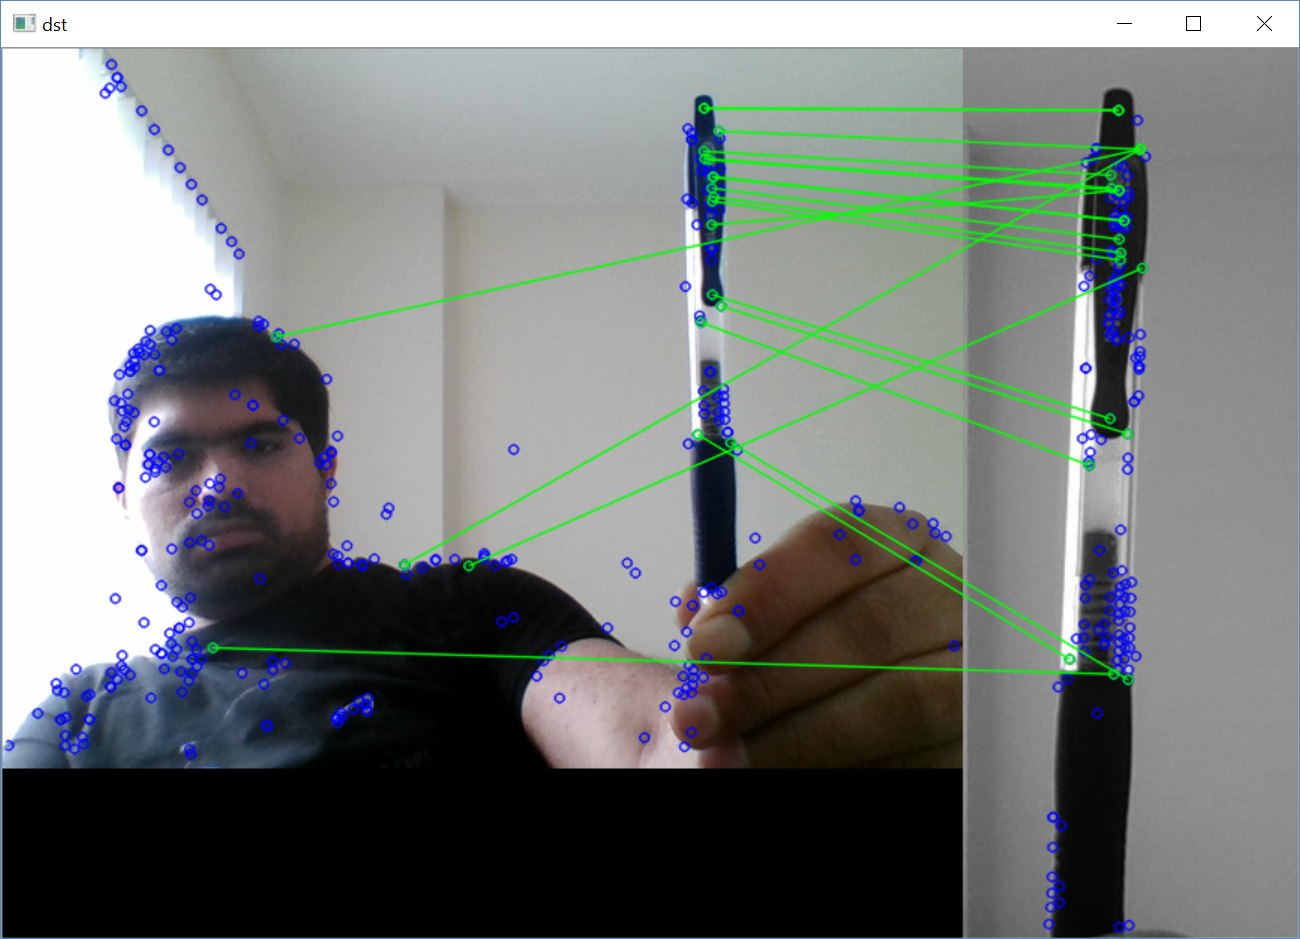

In [2]:
from IPython.display import Image
Image(filename='./SIFT/flann_output.png', width=900)